# Model application and analysis

#### Research  question: Is it possibile to identify occupational trends in the periods 2018-2019 and 2020-2021? If so, what are the  differences between the two periods?

The original idea was to let a hierarchical clustering model to find the clusters using the original data (81 features between 2009 and 2021) but the amount of resources required was just too high. Even via reduction and limiting to smaller periods the computational time and memory was too high.
Instead, I decided to use a different, more efficient clustering model (Kmeans) and then doing some analysis to see how sparse the elements are and deducing whether some trends are present or not

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy.random as nr
from scipy.spatial import distance_matrix

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

Load the reduced data for the period 2020-2021 

In [2]:
inputPath = "<input_path>\\Contracts_reduced_A2020.csv"
contracts_red_after2020 = pd.read_csv(inputPath)
contracts_red_after2020

,Component 1,Component 2
0,2.197577,5.119778
1,2.937710,0.604172
2,-1.217721,0.546854
3,2.952852,0.554283
4,-1.129646,0.703622
...,...,...
1903752,-2.099172,0.192675
1903753,-1.864039,-0.715630
1903754,-0.517797,0.325415
1903755,1.134546,-0.117313


We try to understand what is the best number of clusters using the elbow method

In [3]:
def kmeansElbow(X,range_n_clusters):
# Create all possible cluster solutions with a loop
    wcss = []
    for n_clusters in range_n_clusters:

        # Cluster solution with i clusters
        kmeans = KMeans(n_clusters= n_clusters)
        # Fit the data
        kmeans.fit(X)
        # Find WCSS for the current iteration (inertia measure)
        wcss_iter = kmeans.inertia_
        # Append the value to the WCSS list
        wcss.append(wcss_iter)

    
    return wcss

Text(0, 0.5, 'Within-cluster Sum of Squares')

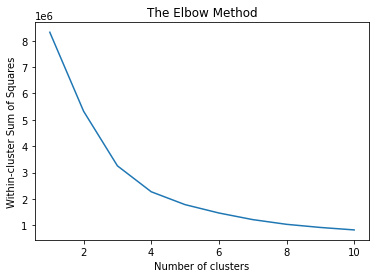

In [4]:
wcss = kmeansElbow(contracts_red_after2020, range(1,11))


number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

The inertia values are a bit high, which seems to indicate a loose connections between the data and their respective centroids. The best number of clusters seems to be 4. 

In [5]:
modelA2020 = KMeans(n_clusters=3)
labels = modelA2020.fit_predict(contracts_red_after2020)
centroids = modelA2020.cluster_centers_
centroids

array([[ 2.51963273,  4.51481344],
       [ 1.77756872, -1.03934188],
       [-0.79689214,  0.10794119]])

The centroids seems fairly separated

Now plot the data togheter with the centroids to better see the distribution.

In [6]:
#label the data
labelled_A2020 = pd.concat([contracts_red_after2020, pd.DataFrame(labels)], axis = 1)
labelled_A2020=labelled_A2020.rename(columns={0:"Label"})
labelled_A2020

,Component 1,Component 2,Label
0,2.197577,5.119778,0
1,2.937710,0.604172,1
2,-1.217721,0.546854,2
3,2.952852,0.554283,1
4,-1.129646,0.703622,2
...,...,...,...
1903752,-2.099172,0.192675,2
1903753,-1.864039,-0.715630,2
1903754,-0.517797,0.325415,2
1903755,1.134546,-0.117313,1


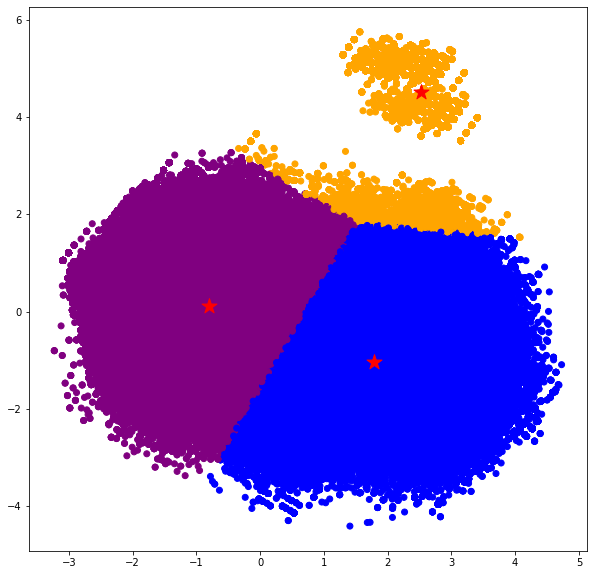

In [7]:
#Plot the data and label
fig = plt.figure(figsize=(10,10))
colors = ['orange','green','blue','purple']
plt.scatter(labelled_A2020['Component 1'], labelled_A2020['Component 2'], c=labelled_A2020['Label'], cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
plt.show()

The majority of the data does not seem to relate too much with their respective centroids. The centroid for label 3 instead seems to actually reveal a niche of data which is numerous enough to move the centroid away from the main blob 

In [8]:
isolated_val = len(labelled_A2020[(labelled_A2020['Component 1'] > 1)&
                                  (labelled_A2020['Component 2'] > 3.5)&
                                  (labelled_A2020['Label'] == 1)])
isolated_val/len(labelled_A2020)

0.0

This represent the 4% of the data.

In conclusion, it seems that the only trend that we can deduce is represented by the centroid `[2.5331104 , 4.58459649]`. Considering the negative correlation between the components and the original features, this indicate a small occupational trend for foreigners with a low level of education for part-time (or an undefined time schedule) job.

Now the same thing for the period 2018-2019 

In [9]:
inputPath = "C:\\Users\\rotol\\Downloads\\Contracts_reduced_B2020.csv"
contracts_red_before2020 = pd.read_csv(inputPath)
contracts_red_before2020

,Component 1,Component 2
0,-1.125821,0.439590
1,-0.141546,0.783764
2,2.034162,0.224076
3,-1.142535,1.828060
4,0.881023,4.891900
...,...,...
2597479,-0.037192,-0.949140
2597480,0.002113,0.593836
2597481,-0.521089,-0.676802
2597482,0.243329,0.339531


Text(0, 0.5, 'Within-cluster Sum of Squares')

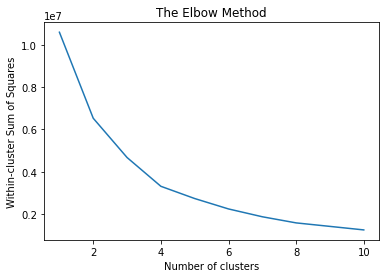

In [10]:
wcss = kmeansElbow(contracts_red_before2020, range(1,11))


number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

We try with 4 clusters

In [11]:
modelB2020 = KMeans(n_clusters=3)
labels = modelB2020.fit_predict(contracts_red_before2020)
centroids = modelB2020.cluster_centers_
centroids

array([[ 1.99998223, -0.68253945],
       [-0.76864856, -0.07530375],
       [ 1.78127591,  3.29697727]])

In [12]:
#label the data
labelled_B2020 = pd.concat([contracts_red_before2020, pd.DataFrame(labels)], axis = 1)
labelled_B2020=labelled_B2020.rename(columns={0:"Label"})
labelled_B2020

,Component 1,Component 2,Label
0,-1.125821,0.439590,1
1,-0.141546,0.783764,1
2,2.034162,0.224076,0
3,-1.142535,1.828060,1
4,0.881023,4.891900,2
...,...,...,...
2597479,-0.037192,-0.949140,1
2597480,0.002113,0.593836,1
2597481,-0.521089,-0.676802,1
2597482,0.243329,0.339531,1


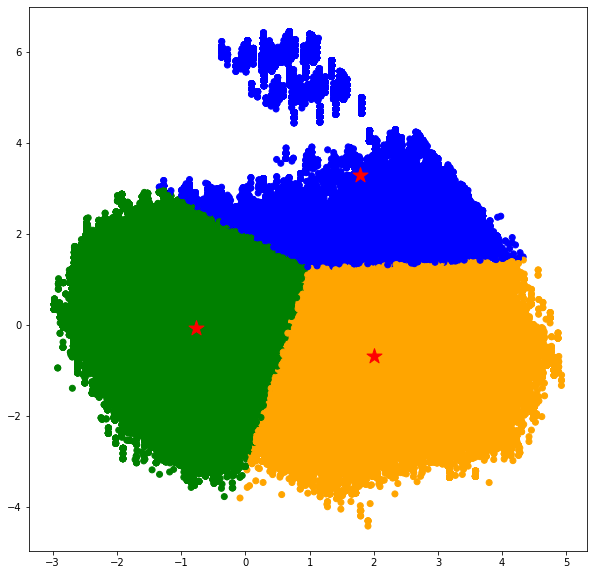

In [13]:
#Plot the data and label
fig = plt.figure(figsize=(10,10))
colors = ['orange','green','blue']
plt.scatter(labelled_B2020['Component 1'], labelled_B2020['Component 2'], c=labelled_B2020['Label'], cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
plt.show()

In [14]:
isolated_val = len(labelled_B2020[(labelled_B2020['Component 2'] > 4.5)])
isolated_val/len(labelled_B2020)

0.018801655756108603

From the plot we see a situation similar to the previous case. In this, though, the model shows us that those data do not represent a trend, but they are most likely outliers. The data are quite distant from one another and  there does not seem to  be any trend.

We can conclude by saying that during the pandemic many not full-time jobs for poorly educated foreigners have been activated.

analysis for after 2020

In [15]:
input_path2  = "C:\\Users\\rotol\\Downloads\\Contracts_feature_A2020.csv"
conAfter2020 = pd.read_csv(input_path2)
conAfter2020 = conAfter2020.drop(labels=['index'], axis=1)
conAfter2020

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,0_0,0_1,0_2,0_3,...,PROVINCIA_COMO,PROVINCIA_CREMONA,PROVINCIA_LECCO,PROVINCIA_LODI,PROVINCIA_MANTOVA,PROVINCIA_MILANO,PROVINCIA_MONZA E BRIANZA,PROVINCIA_PAVIA,PROVINCIA_SONDRIO,PROVINCIA_VARESE
0,0,3,188,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,1075,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,501,3,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1133,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,501,3,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903752,1,1,1172,3,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1903753,1,2,1044,5,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1903754,0,3,560,3,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1903755,0,3,87,3,2,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
conAfter2020 = pd.concat([conAfter2020, labelled_A2020.Label], axis = 1)

In [17]:
conAfter2020

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,0_0,0_1,0_2,0_3,...,PROVINCIA_CREMONA,PROVINCIA_LECCO,PROVINCIA_LODI,PROVINCIA_MANTOVA,PROVINCIA_MILANO,PROVINCIA_MONZA E BRIANZA,PROVINCIA_PAVIA,PROVINCIA_SONDRIO,PROVINCIA_VARESE,Label
0,0,3,188,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,1075,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,501,3,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,1,1133,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,2,501,3,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903752,1,1,1172,3,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,2
1903753,1,2,1044,5,2,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
1903754,0,3,560,3,2,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
1903755,0,3,87,3,2,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [18]:
centroids_A2020  = [[ 2.51963273,  4.51481344],
       [-0.79689214,  0.10794119],
       [ 1.77756872, -1.03934188]]

In [19]:
#find minimum distance from centroids
dist_mat = pd.DataFrame(distance_matrix(contracts_red_after2020.values, centroids_A2020))
ctr = 0
bestC = 0
current = 99999
for i in dist_mat[0]:
    if i < current:
        current = i
        bestC = ctr
    ctr = ctr+1

bestC

1227630

In [20]:
print(dist_mat[0].min())
print(dist_mat.iloc[bestC][0])

0.026846423554032734
0.026846423554032734


In [21]:
bestForCenter = conAfter2020.iloc[bestC]
bestForCenter = pd.DataFrame(bestForCenter)
bestForCenter = bestForCenter.transpose()
pd.set_option('display.max_columns', None)
bestForCenter

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,0_10,CONTRATTO_APPRENDISTATO DI ALTA FORMAZIONE E RICERCA PER LAVORATORI IN MOBILITA¿,CONTRATTO_APPRENDISTATO EX ART.16 L. 196/97,CONTRATTO_APPRENDISTATO PER L'ACQUISIZIONE DI DIPLOMA O PER PERCORSI DI ALTA FORMAZIONE,CONTRATTO_APPRENDISTATO PER L'ESPLETAMENTO DEL DIRITTO DOVERE DI ISTRUZIONE FORMAZIONE,"CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE",CONTRATTO_APPRENDISTATO PER LA QUALIFICA PROFESSIONALE E PER IL DIPLOMA PROFESSIONALE PER LAVORATORI IN MOBILITA¿,CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE,CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE,CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE PER LAVORATORI IN MOBILITA¿,CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE PER LAVORATORI STAGIONALI,CONTRATTO_ASSOCIAZIONE IN PARTECIPAZIONE,CONTRATTO_ASSOCIAZIONE IN PARTECIPAZIONE A TEMPO DETERMINATO,CONTRATTO_ASSOCIAZIONE IN PARTECIPAZIONE A TEMPO INDETERMINATO,CONTRATTO_COLLABORAZIONE COORDINATA E CONTINUATIVA,CONTRATTO_CONTRATTI DI BORSA LAVORO E ALTRE WORK EXPERIENCES,CONTRATTO_CONTRATTO DI AGENZIA,CONTRATTO_CONTRATTO DI AGENZIA A TEMPO DETERMINATO,CONTRATTO_CONTRATTO DI AGENZIA A TEMPO INDETERMINATO,CONTRATTO_CONTRATTO DI FORMAZIONE LAVORO (SOLO PUBBLICA AMMINISTRAZIONE),CONTRATTO_CONTRATTO DI INSERIMENTO LAVORATIVO,CONTRATTO_LAVORO A DOMICILIO,CONTRATTO_LAVORO A DOMICILIO A TEMPO DETERMINATO,CONTRATTO_LAVORO A DOMICILIO A TEMPO INDETERMINATO,CONTRATTO_LAVORO A PROGETTO / COLLABORAZIONE COORDINATA E CONTINUATIVA,CONTRATTO_LAVORO A TEMPO DETERMINATO,CONTRATTO_LAVORO A TEMPO DETERMINATO PER SOSTITUZIONE,CONTRATTO_LAVORO A TEMPO INDETERMINATO,CONTRATTO_LAVORO AUTONOMO NELLO SPETTACOLO,CONTRATTO_LAVORO CONGIUNTO IN AGRICOLTURA,CONTRATTO_LAVORO DIPENDENTE NELLA P.A. A TEMPO DETERMINATO,CONTRATTO_LAVORO DIPENDENTE NELLA P.A. A TEMPO INDETERMINATO,CONTRATTO_LAVORO DOMESTICO,CONTRATTO_LAVORO DOMESTICO A TEMPO DETERMINATO,CONTRATTO_LAVORO DOMESTICO A TEMPO INDETERMINATO,CONTRATTO_LAVORO IN AGRICOLTURA A TEMPO DETERMINATO,CONTRATTO_LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIONE) A TEMPO DETERMINATO,CONTRATTO_LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIONE) A TEMPO INDETERMINATO,CONTRATTO_LAVORO INTERMITTENTE,CONTRATTO_LAVORO INTERMITTENTE A TEMPO INDETERMINATO,CONTRATTO_LAVORO INTERMITTENTE A TEMPO DETERMINATO,CONTRATTO_LAVORO MARITTIMO A TEMPO DETERMINATO,CONTRATTO_LAVORO MARITTIMO A TEMPO INDETERMINATO,CONTRATTO_LAVORO NELLO SPETTACOLO A TEMPO DETERMINATO,CONTRATTO_LAVORO NELLO SPETTACOLO A TEMPO INDETERMINATO,CONTRATTO_LAVORO O ATTIVITÀ SOCIALMENTE UTILE (LSU - ASU),CONTRATTO_LAVORO OCCASIONALE,CONTRATTO_LAVORO RIPARTITO,CONTRATTO_LAVORO RIPARTITO A TEMPO DETERMINATO,CONTRATTO_LAVORO RIPARTITO A TEMPO INDETERMINATO,CONTRATTO_Lavoro a tempo determinato con piattaforma,CONTRATTO_Lavoro a tempo determinato per sostituzione con piattaforma,CONTRATTO_Lavoro a tempo indeterminato con piattaforma,CONTRATTO_TIROCINIO,PROVINCIA_BRESCIA,PROVINCIA_COMO,PROVINCIA_CREMONA,PROVINCIA_LECCO,PROVINCIA_LODI,PROVINCIA_MANTOVA,PROVINCIA_MILANO,PROVINCIA_MONZA E BRIANZA,PROVINCIA_PAVIA,PROVINCIA_SONDRIO,PROVINCIA_VARESE,Label
1227630,1,4,188,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [22]:
#find minimum distance from centroids
dist_mat = pd.DataFrame(distance_matrix(contracts_red_after2020.values, centroids_A2020))
ctr = 0
bestC = 0
current = 99999
for i in dist_mat[1]:
    if i < current:
        current = i
        bestC = ctr
    ctr = ctr+1

bestC

print(dist_mat[1].min())
print(dist_mat.iloc[bestC][1])

bestForCenter = conAfter2020.iloc[bestC]
bestForCenter = pd.DataFrame(bestForCenter)
bestForCenter = bestForCenter.transpose()
pd.set_option('display.max_columns', None)
bestForCenter

0.0039374485891898806
0.0039374485891898806


,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,0_10,CONTRATTO_APPRENDISTATO DI ALTA FORMAZIONE E RICERCA PER LAVORATORI IN MOBILITA¿,CONTRATTO_APPRENDISTATO EX ART.16 L. 196/97,CONTRATTO_APPRENDISTATO PER L'ACQUISIZIONE DI DIPLOMA O PER PERCORSI DI ALTA FORMAZIONE,CONTRATTO_APPRENDISTATO PER L'ESPLETAMENTO DEL DIRITTO DOVERE DI ISTRUZIONE FORMAZIONE,"CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE",CONTRATTO_APPRENDISTATO PER LA QUALIFICA PROFESSIONALE E PER IL DIPLOMA PROFESSIONALE PER LAVORATORI IN MOBILITA¿,CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE,CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE,CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE PER LAVORATORI IN MOBILITA¿,CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE PER LAVORATORI STAGIONALI,CONTRATTO_ASSOCIAZIONE IN PARTECIPAZIONE,CONTRATTO_ASSOCIAZIONE IN PARTECIPAZIONE A TEMPO DETERMINATO,CONTRATTO_ASSOCIAZIONE IN PARTECIPAZIONE A TEMPO INDETERMINATO,CONTRATTO_COLLABORAZIONE COORDINATA E CONTINUATIVA,CONTRATTO_CONTRATTI DI BORSA LAVORO E ALTRE WORK EXPERIENCES,CONTRATTO_CONTRATTO DI AGENZIA,CONTRATTO_CONTRATTO DI AGENZIA A TEMPO DETERMINATO,CONTRATTO_CONTRATTO DI AGENZIA A TEMPO INDETERMINATO,CONTRATTO_CONTRATTO DI FORMAZIONE LAVORO (SOLO PUBBLICA AMMINISTRAZIONE),CONTRATTO_CONTRATTO DI INSERIMENTO LAVORATIVO,CONTRATTO_LAVORO A DOMICILIO,CONTRATTO_LAVORO A DOMICILIO A TEMPO DETERMINATO,CONTRATTO_LAVORO A DOMICILIO A TEMPO INDETERMINATO,CONTRATTO_LAVORO A PROGETTO / COLLABORAZIONE COORDINATA E CONTINUATIVA,CONTRATTO_LAVORO A TEMPO DETERMINATO,CONTRATTO_LAVORO A TEMPO DETERMINATO PER SOSTITUZIONE,CONTRATTO_LAVORO A TEMPO INDETERMINATO,CONTRATTO_LAVORO AUTONOMO NELLO SPETTACOLO,CONTRATTO_LAVORO CONGIUNTO IN AGRICOLTURA,CONTRATTO_LAVORO DIPENDENTE NELLA P.A. A TEMPO DETERMINATO,CONTRATTO_LAVORO DIPENDENTE NELLA P.A. A TEMPO INDETERMINATO,CONTRATTO_LAVORO DOMESTICO,CONTRATTO_LAVORO DOMESTICO A TEMPO DETERMINATO,CONTRATTO_LAVORO DOMESTICO A TEMPO INDETERMINATO,CONTRATTO_LAVORO IN AGRICOLTURA A TEMPO DETERMINATO,CONTRATTO_LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIONE) A TEMPO DETERMINATO,CONTRATTO_LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIONE) A TEMPO INDETERMINATO,CONTRATTO_LAVORO INTERMITTENTE,CONTRATTO_LAVORO INTERMITTENTE A TEMPO INDETERMINATO,CONTRATTO_LAVORO INTERMITTENTE A TEMPO DETERMINATO,CONTRATTO_LAVORO MARITTIMO A TEMPO DETERMINATO,CONTRATTO_LAVORO MARITTIMO A TEMPO INDETERMINATO,CONTRATTO_LAVORO NELLO SPETTACOLO A TEMPO DETERMINATO,CONTRATTO_LAVORO NELLO SPETTACOLO A TEMPO INDETERMINATO,CONTRATTO_LAVORO O ATTIVITÀ SOCIALMENTE UTILE (LSU - ASU),CONTRATTO_LAVORO OCCASIONALE,CONTRATTO_LAVORO RIPARTITO,CONTRATTO_LAVORO RIPARTITO A TEMPO DETERMINATO,CONTRATTO_LAVORO RIPARTITO A TEMPO INDETERMINATO,CONTRATTO_Lavoro a tempo determinato con piattaforma,CONTRATTO_Lavoro a tempo determinato per sostituzione con piattaforma,CONTRATTO_Lavoro a tempo indeterminato con piattaforma,CONTRATTO_TIROCINIO,PROVINCIA_BRESCIA,PROVINCIA_COMO,PROVINCIA_CREMONA,PROVINCIA_LECCO,PROVINCIA_LODI,PROVINCIA_MANTOVA,PROVINCIA_MILANO,PROVINCIA_MONZA E BRIANZA,PROVINCIA_PAVIA,PROVINCIA_SONDRIO,PROVINCIA_VARESE,Label
849078,0,2,123,5,2,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2


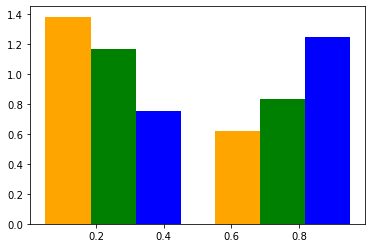

In [23]:
conAfter20201 = conAfter2020[(conAfter2020.Label == 0)]['GENERE']
conAfter20202 =  conAfter2020[(conAfter2020.Label == 1)]['GENERE']
conAfter20203 =  conAfter2020[(conAfter2020.Label == 2)]['GENERE']
plt.hist([conAfter20201,conAfter20202,conAfter20203], 2, density=True, histtype='bar',  color=colors, label=conAfter2020.GENERE)
plt.show()

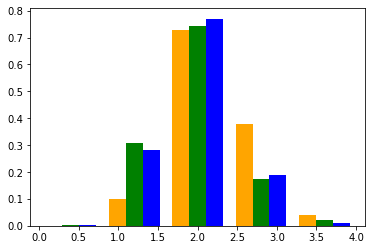

In [24]:
conAfter20201 = conAfter2020[(conAfter2020.Label == 0)]['ETA']
conAfter20202 =  conAfter2020[(conAfter2020.Label == 1)]['ETA']
conAfter20203 =  conAfter2020[(conAfter2020.Label == 2)]['ETA']
plt.hist([conAfter20201,conAfter20202,conAfter20203], 5, density=True, histtype='bar',color=colors, label=conAfter2020.ETA)
plt.show()

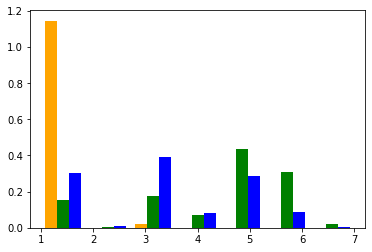

In [25]:
conAfter20201 = conAfter2020[(conAfter2020.Label == 0)]['TITOLOSTUDIO']
conAfter20202 =  conAfter2020[(conAfter2020.Label == 1)]['TITOLOSTUDIO']
conAfter20203 =  conAfter2020[(conAfter2020.Label == 2)]['TITOLOSTUDIO']
plt.hist([conAfter20201,conAfter20202,conAfter20203], 7, density=True,color=colors, histtype='bar')
plt.show()

In [26]:
len(conAfter2020[(conAfter2020.TITOLOSTUDIO == 0)])

0

In [27]:
len(conAfter2020[(conAfter2020.TITOLOSTUDIO == 1)&(conAfter2020.Label == 0)])

78508

In [28]:
len(conAfter2020[(conAfter2020.TITOLOSTUDIO == 1)&(conAfter2020.Label == 0)])/len(conAfter2020[(conAfter2020.Label == 0)])

0.9818777592956214

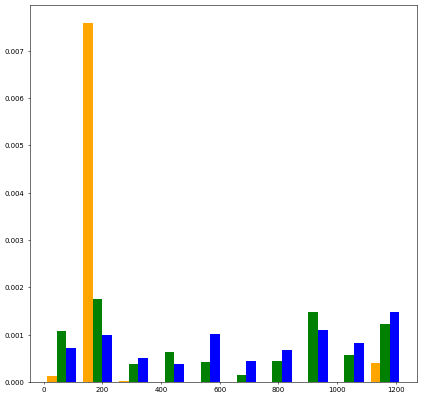

In [29]:
conAfter20201 = conAfter2020[(conAfter2020.Label == 0)]['SETTOREECONOMICODETTAGLIO']
conAfter20202 =  conAfter2020[(conAfter2020.Label == 1)]['SETTOREECONOMICODETTAGLIO']
conAfter20203 =  conAfter2020[(conAfter2020.Label == 2)]['SETTOREECONOMICODETTAGLIO']
plt.figure(figsize=(10, 10), dpi=50)
plt.hist([conAfter20201,conAfter20202,conAfter20203], 10, density=True,color=colors, histtype='bar')
plt.show()

In [30]:
len(conAfter2020[(conAfter2020.SETTOREECONOMICODETTAGLIO == 188)&(conAfter2020.Label == 0)])/len(conAfter2020[(conAfter2020.Label == 0)])

0.9126655577372838

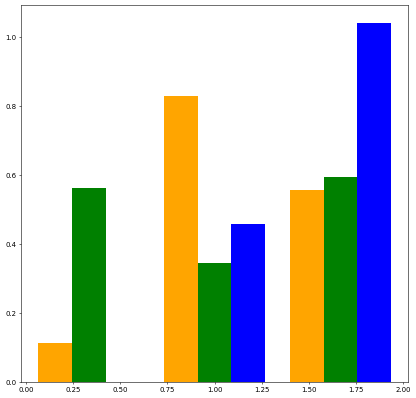

In [31]:
conAfter20201 = conAfter2020[(conAfter2020.Label == 0)]['MODALITALAVORO']
conAfter20202 =  conAfter2020[(conAfter2020.Label == 1)]['MODALITALAVORO']
conAfter20203 =  conAfter2020[(conAfter2020.Label == 2)]['MODALITALAVORO']
plt.figure(figsize=(10, 10), dpi=50)
plt.hist([conAfter20201,conAfter20202,conAfter20203], 3, density=True,color=colors, histtype='bar')
plt.show()

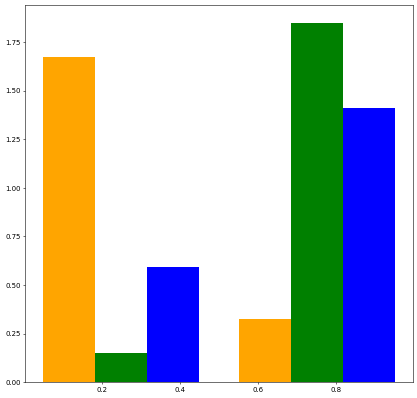

In [32]:
conAfter20201 = conAfter2020[(conAfter2020.Label == 0)]['CITTADINANZA']
conAfter20202 =  conAfter2020[(conAfter2020.Label == 1)]['CITTADINANZA']
conAfter20203 =  conAfter2020[(conAfter2020.Label == 2)]['CITTADINANZA']
plt.figure(figsize=(10, 10), dpi=50)
plt.hist([conAfter20201,conAfter20202,conAfter20203], 2, density=True,color=colors, histtype='bar')
plt.show()

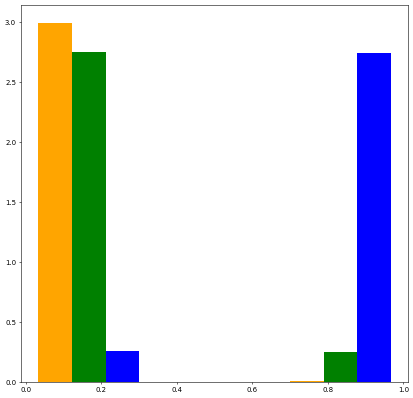

In [33]:
conAfter20201 = conAfter2020[(conAfter2020.Label == 0)]['CONTRATTO_LAVORO A TEMPO DETERMINATO']
conAfter20202 =  conAfter2020[(conAfter2020.Label == 1)]['CONTRATTO_LAVORO A TEMPO DETERMINATO']
conAfter20203 =  conAfter2020[(conAfter2020.Label == 2)]['CONTRATTO_LAVORO A TEMPO DETERMINATO']
plt.figure(figsize=(10, 10), dpi=50)
plt.hist([conAfter20201,conAfter20202,conAfter20203], 3, density=True,color=colors, histtype='bar')
plt.show()

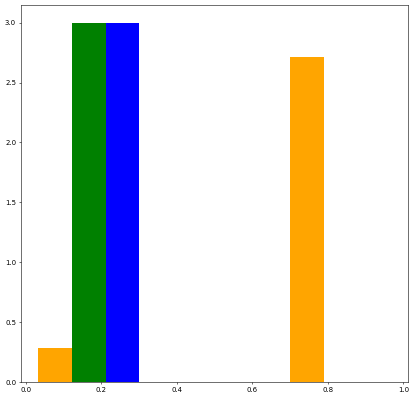

In [34]:
conAfter20201 = conAfter2020[(conAfter2020.Label == 0)]['CONTRATTO_LAVORO DOMESTICO']
conAfter20202 =  conAfter2020[(conAfter2020.Label == 1)]['CONTRATTO_LAVORO DOMESTICO']
conAfter20203 =  conAfter2020[(conAfter2020.Label == 2)]['CONTRATTO_LAVORO DOMESTICO']
plt.figure(figsize=(10, 10), dpi=50)
plt.hist([conAfter20201,conAfter20202,conAfter20203], 3, density=True,color=colors, histtype='bar')
plt.show()

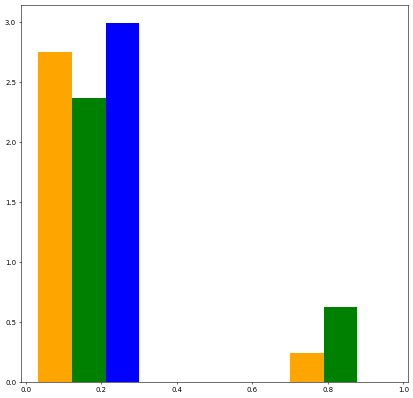

In [35]:
conAfter20201 = conAfter2020[(conAfter2020.Label == 0)]['CONTRATTO_LAVORO INTERMITTENTE']
conAfter20202 =  conAfter2020[(conAfter2020.Label == 1)]['CONTRATTO_LAVORO INTERMITTENTE']
conAfter20203 =  conAfter2020[(conAfter2020.Label == 2)]['CONTRATTO_LAVORO INTERMITTENTE']
plt.figure(figsize=(10, 10), dpi=50)
plt.hist([conAfter20201,conAfter20202,conAfter20203], 3, density=True,color=colors, histtype='bar')
plt.show()



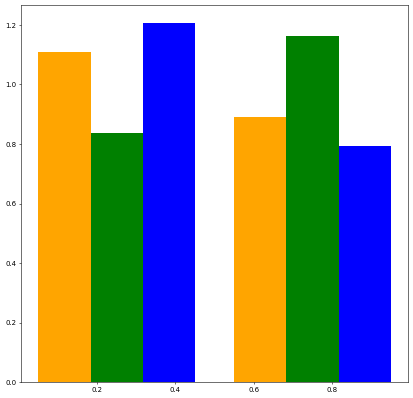

In [36]:
conAfter20201 = conAfter2020[(conAfter2020.Label == 0)]['PROVINCIA_MILANO']
conAfter20202 =  conAfter2020[(conAfter2020.Label == 1)]['PROVINCIA_MILANO']
conAfter20203 =  conAfter2020[(conAfter2020.Label == 2)]['PROVINCIA_MILANO']
plt.figure(figsize=(10, 10), dpi=50)
plt.hist([conAfter20201,conAfter20202,conAfter20203], 2, density=True,color=colors, histtype='bar')
plt.show()

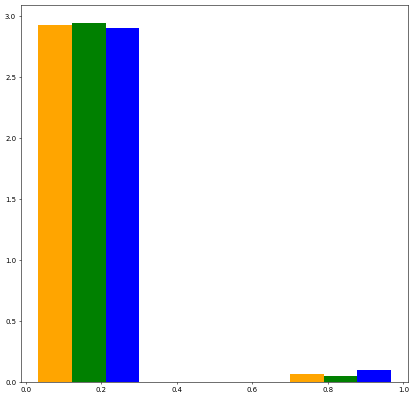

In [37]:
conAfter20201 = conAfter2020[(conAfter2020.Label == 0)]['PROVINCIA_CREMONA']
conAfter20202 =  conAfter2020[(conAfter2020.Label == 1)]['PROVINCIA_CREMONA']
conAfter20203 =  conAfter2020[(conAfter2020.Label == 2)]['PROVINCIA_CREMONA']
plt.figure(figsize=(10, 10), dpi=50)
plt.hist([conAfter20201,conAfter20202,conAfter20203], 3, density=True,color=colors, histtype='bar')
plt.show()

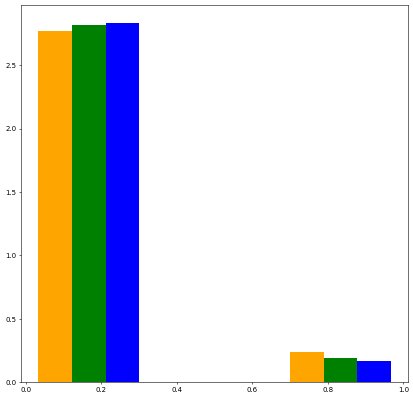

In [38]:
conAfter20201 = conAfter2020[(conAfter2020.Label == 0)]['PROVINCIA_VARESE']
conAfter20202 =  conAfter2020[(conAfter2020.Label == 1)]['PROVINCIA_VARESE']
conAfter20203 =  conAfter2020[(conAfter2020.Label == 2)]['PROVINCIA_VARESE']
plt.figure(figsize=(10, 10), dpi=50)
plt.hist([conAfter20201,conAfter20202,conAfter20203], 3, density=True,color=colors, histtype='bar')
plt.show()

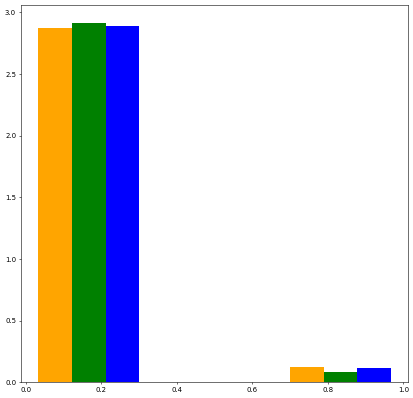

In [39]:
conAfter20201 = conAfter2020[(conAfter2020.Label == 0)]['PROVINCIA_PAVIA']
conAfter20202 =  conAfter2020[(conAfter2020.Label == 1)]['PROVINCIA_PAVIA']
conAfter20203 =  conAfter2020[(conAfter2020.Label == 2)]['PROVINCIA_PAVIA']
plt.figure(figsize=(10, 10), dpi=50)
plt.hist([conAfter20201,conAfter20202,conAfter20203], 3, density=True,color=colors, histtype='bar')
plt.show()

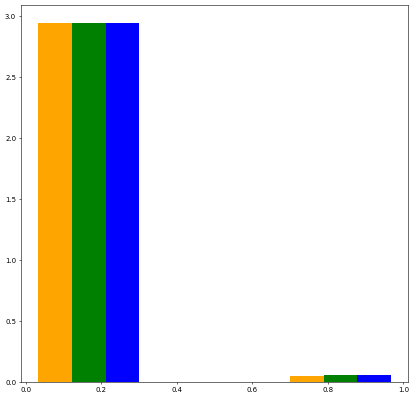

In [40]:
conAfter20201 = conAfter2020[(conAfter2020.Label == 0)]['PROVINCIA_SONDRIO']
conAfter20202 =  conAfter2020[(conAfter2020.Label == 1)]['PROVINCIA_SONDRIO']
conAfter20203 =  conAfter2020[(conAfter2020.Label == 2)]['PROVINCIA_SONDRIO']
plt.figure(figsize=(10, 10), dpi=50)
plt.hist([conAfter20201,conAfter20202,conAfter20203], 3, density=True,color=colors, histtype='bar')
plt.show()

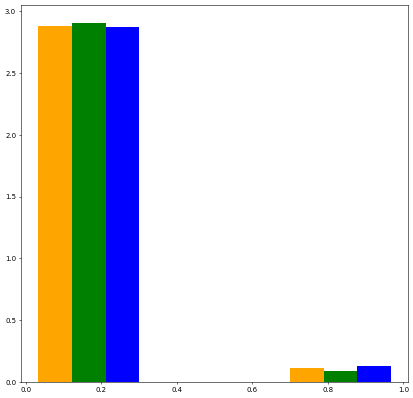

In [41]:
conAfter20201 = conAfter2020[(conAfter2020.Label == 0)]['PROVINCIA_MANTOVA']
conAfter20202 =  conAfter2020[(conAfter2020.Label == 1)]['PROVINCIA_MANTOVA']
conAfter20203 =  conAfter2020[(conAfter2020.Label == 2)]['PROVINCIA_MANTOVA']
plt.figure(figsize=(10, 10), dpi=50)
plt.hist([conAfter20201,conAfter20202,conAfter20203], 3, density=True,color=colors, histtype='bar')
plt.show()

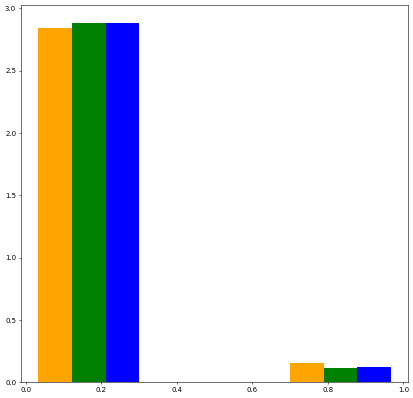

In [42]:
conAfter20201 = conAfter2020[(conAfter2020.Label == 0)]['PROVINCIA_COMO']
conAfter20202 =  conAfter2020[(conAfter2020.Label == 1)]['PROVINCIA_COMO']
conAfter20203 =  conAfter2020[(conAfter2020.Label == 2)]['PROVINCIA_COMO']
plt.figure(figsize=(10, 10), dpi=50)
plt.hist([conAfter20201,conAfter20202,conAfter20203], 3, density=True,color=colors, histtype='bar')
plt.show()

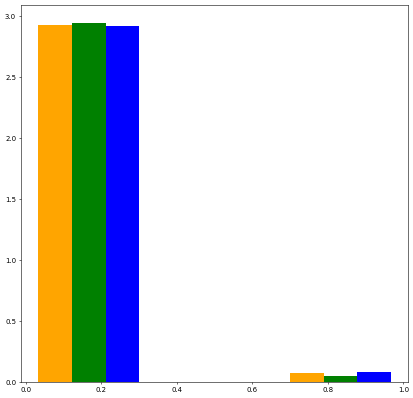

In [43]:
conAfter20201 = conAfter2020[(conAfter2020.Label == 0)]['PROVINCIA_LECCO']
conAfter20202 =  conAfter2020[(conAfter2020.Label == 1)]['PROVINCIA_LECCO']
conAfter20203 =  conAfter2020[(conAfter2020.Label == 2)]['PROVINCIA_LECCO']
plt.figure(figsize=(10, 10), dpi=50)
plt.hist([conAfter20201,conAfter20202,conAfter20203], 3, density=True,color=colors, histtype='bar')
plt.show()

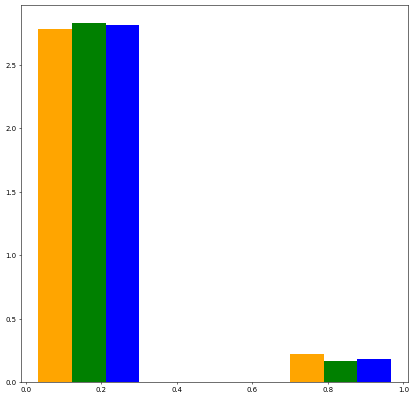

In [44]:
conAfter20201 = conAfter2020[(conAfter2020.Label == 0)]['PROVINCIA_MONZA E BRIANZA']
conAfter20202 =  conAfter2020[(conAfter2020.Label == 1)]['PROVINCIA_MONZA E BRIANZA']
conAfter20203 =  conAfter2020[(conAfter2020.Label == 2)]['PROVINCIA_MONZA E BRIANZA']
plt.figure(figsize=(10, 10), dpi=50)
plt.hist([conAfter20201,conAfter20202,conAfter20203], 3, density=True,color=colors, histtype='bar')
plt.show()

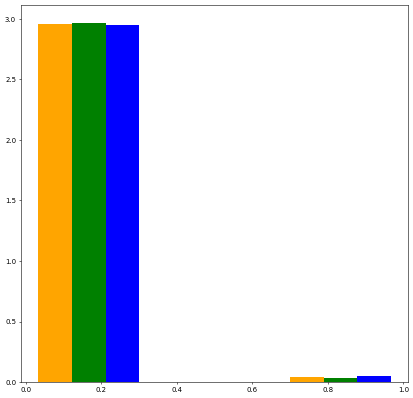

In [45]:
conAfter20201 = conAfter2020[(conAfter2020.Label == 0)]['PROVINCIA_LODI']
conAfter20202 =  conAfter2020[(conAfter2020.Label == 1)]['PROVINCIA_LODI']
conAfter20203 =  conAfter2020[(conAfter2020.Label == 2)]['PROVINCIA_LODI']
plt.figure(figsize=(10, 10), dpi=50)
plt.hist([conAfter20201,conAfter20202,conAfter20203], 3, density=True,color=colors, histtype='bar')
plt.show()

PROVINCIA_BERGAMO NON C'è

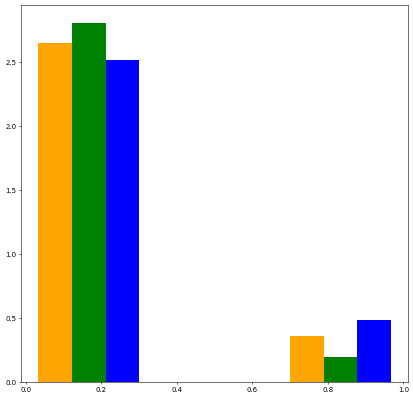

In [46]:
conAfter20201 = conAfter2020[(conAfter2020.Label == 0)]['PROVINCIA_BRESCIA']
conAfter20202 =  conAfter2020[(conAfter2020.Label == 1)]['PROVINCIA_BRESCIA']
conAfter20203 =  conAfter2020[(conAfter2020.Label == 2)]['PROVINCIA_BRESCIA']
plt.figure(figsize=(10, 10), dpi=50)
plt.hist([conAfter20201,conAfter20202,conAfter20203], 3, density=True,color=colors, histtype='bar')
plt.show()

In [47]:
conAfter2020['PROVINCIA_MONZA E BRIANZA']

0          0
1          0
2          0
3          0
4          0
          ..
1903752    1
1903753    1
1903754    1
1903755    1
1903756    0
Name: PROVINCIA_MONZA E BRIANZA, Length: 1903757, dtype: int64

analysis for before 2020

In [48]:
input_path2  = "C:\\Users\\rotol\\Downloads\\Contracts_feature_B2020.csv"
conBefore2020 = pd.read_csv(input_path2)
conBefore2020 = conBefore2020.drop(labels=['index'], axis=1)
conBefore2020

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,0_10,CONTRATTO_APPRENDISTATO DI ALTA FORMAZIONE E RICERCA PER LAVORATORI IN MOBILITA¿,CONTRATTO_APPRENDISTATO EX ART.16 L. 196/97,CONTRATTO_APPRENDISTATO PER L'ACQUISIZIONE DI DIPLOMA O PER PERCORSI DI ALTA FORMAZIONE,CONTRATTO_APPRENDISTATO PER L'ESPLETAMENTO DEL DIRITTO DOVERE DI ISTRUZIONE FORMAZIONE,"CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE",CONTRATTO_APPRENDISTATO PER LA QUALIFICA PROFESSIONALE E PER IL DIPLOMA PROFESSIONALE PER LAVORATORI IN MOBILITA¿,CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE,CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE,CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE PER LAVORATORI IN MOBILITA¿,CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE PER LAVORATORI STAGIONALI,CONTRATTO_ASSOCIAZIONE IN PARTECIPAZIONE,CONTRATTO_ASSOCIAZIONE IN PARTECIPAZIONE A TEMPO DETERMINATO,CONTRATTO_ASSOCIAZIONE IN PARTECIPAZIONE A TEMPO INDETERMINATO,CONTRATTO_COLLABORAZIONE COORDINATA E CONTINUATIVA,CONTRATTO_CONTRATTI DI BORSA LAVORO E ALTRE WORK EXPERIENCES,CONTRATTO_CONTRATTO DI AGENZIA,CONTRATTO_CONTRATTO DI AGENZIA A TEMPO DETERMINATO,CONTRATTO_CONTRATTO DI AGENZIA A TEMPO INDETERMINATO,CONTRATTO_CONTRATTO DI FORMAZIONE LAVORO (SOLO PUBBLICA AMMINISTRAZIONE),CONTRATTO_CONTRATTO DI INSERIMENTO LAVORATIVO,CONTRATTO_LAVORO A DOMICILIO,CONTRATTO_LAVORO A DOMICILIO A TEMPO DETERMINATO,CONTRATTO_LAVORO A DOMICILIO A TEMPO INDETERMINATO,CONTRATTO_LAVORO A PROGETTO / COLLABORAZIONE COORDINATA E CONTINUATIVA,CONTRATTO_LAVORO A TEMPO DETERMINATO,CONTRATTO_LAVORO A TEMPO DETERMINATO PER SOSTITUZIONE,CONTRATTO_LAVORO A TEMPO INDETERMINATO,CONTRATTO_LAVORO AUTONOMO NELLO SPETTACOLO,CONTRATTO_LAVORO CONGIUNTO IN AGRICOLTURA,CONTRATTO_LAVORO DIPENDENTE NELLA P.A. A TEMPO DETERMINATO,CONTRATTO_LAVORO DIPENDENTE NELLA P.A. A TEMPO INDETERMINATO,CONTRATTO_LAVORO DOMESTICO,CONTRATTO_LAVORO DOMESTICO A TEMPO DETERMINATO,CONTRATTO_LAVORO DOMESTICO A TEMPO INDETERMINATO,CONTRATTO_LAVORO IN AGRICOLTURA A TEMPO DETERMINATO,CONTRATTO_LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIONE) A TEMPO DETERMINATO,CONTRATTO_LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIONE) A TEMPO INDETERMINATO,CONTRATTO_LAVORO INTERMITTENTE,CONTRATTO_LAVORO INTERMITTENTE A TEMPO INDETERMINATO,CONTRATTO_LAVORO INTERMITTENTE A TEMPO DETERMINATO,CONTRATTO_LAVORO MARITTIMO A TEMPO DETERMINATO,CONTRATTO_LAVORO MARITTIMO A TEMPO INDETERMINATO,CONTRATTO_LAVORO NELLO SPETTACOLO A TEMPO DETERMINATO,CONTRATTO_LAVORO NELLO SPETTACOLO A TEMPO INDETERMINATO,CONTRATTO_LAVORO O ATTIVITÀ SOCIALMENTE UTILE (LSU - ASU),CONTRATTO_LAVORO OCCASIONALE,CONTRATTO_LAVORO RIPARTITO,CONTRATTO_LAVORO RIPARTITO A TEMPO DETERMINATO,CONTRATTO_LAVORO RIPARTITO A TEMPO INDETERMINATO,CONTRATTO_Lavoro a tempo determinato con piattaforma,CONTRATTO_Lavoro a tempo determinato per sostituzione con piattaforma,CONTRATTO_Lavoro a tempo indeterminato con piattaforma,CONTRATTO_TIROCINIO,PROVINCIA_BRESCIA,PROVINCIA_COMO,PROVINCIA_CREMONA,PROVINCIA_LECCO,PROVINCIA_LODI,PROVINCIA_MANTOVA,PROVINCIA_MILANO,PROVINCIA_MONZA E BRIANZA,PROVINCIA_PAVIA,PROVINCIA_SONDRIO,PROVINCIA_VARESE
0,1,2,831,3,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,3,480,3,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2,871,6,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,3,66,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [49]:
conBefore2020 = pd.concat([conBefore2020, labelled_B2020.Label], axis = 1)
conBefore2020

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,0_10,CONTRATTO_APPRENDISTATO DI ALTA FORMAZIONE E RICERCA PER LAVORATORI IN MOBILITA¿,CONTRATTO_APPRENDISTATO EX ART.16 L. 196/97,CONTRATTO_APPRENDISTATO PER L'ACQUISIZIONE DI DIPLOMA O PER PERCORSI DI ALTA FORMAZIONE,CONTRATTO_APPRENDISTATO PER L'ESPLETAMENTO DEL DIRITTO DOVERE DI ISTRUZIONE FORMAZIONE,"CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE",CONTRATTO_APPRENDISTATO PER LA QUALIFICA PROFESSIONALE E PER IL DIPLOMA PROFESSIONALE PER LAVORATORI IN MOBILITA¿,CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE,CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE,CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE PER LAVORATORI IN MOBILITA¿,CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE PER LAVORATORI STAGIONALI,CONTRATTO_ASSOCIAZIONE IN PARTECIPAZIONE,CONTRATTO_ASSOCIAZIONE IN PARTECIPAZIONE A TEMPO DETERMINATO,CONTRATTO_ASSOCIAZIONE IN PARTECIPAZIONE A TEMPO INDETERMINATO,CONTRATTO_COLLABORAZIONE COORDINATA E CONTINUATIVA,CONTRATTO_CONTRATTI DI BORSA LAVORO E ALTRE WORK EXPERIENCES,CONTRATTO_CONTRATTO DI AGENZIA,CONTRATTO_CONTRATTO DI AGENZIA A TEMPO DETERMINATO,CONTRATTO_CONTRATTO DI AGENZIA A TEMPO INDETERMINATO,CONTRATTO_CONTRATTO DI FORMAZIONE LAVORO (SOLO PUBBLICA AMMINISTRAZIONE),CONTRATTO_CONTRATTO DI INSERIMENTO LAVORATIVO,CONTRATTO_LAVORO A DOMICILIO,CONTRATTO_LAVORO A DOMICILIO A TEMPO DETERMINATO,CONTRATTO_LAVORO A DOMICILIO A TEMPO INDETERMINATO,CONTRATTO_LAVORO A PROGETTO / COLLABORAZIONE COORDINATA E CONTINUATIVA,CONTRATTO_LAVORO A TEMPO DETERMINATO,CONTRATTO_LAVORO A TEMPO DETERMINATO PER SOSTITUZIONE,CONTRATTO_LAVORO A TEMPO INDETERMINATO,CONTRATTO_LAVORO AUTONOMO NELLO SPETTACOLO,CONTRATTO_LAVORO CONGIUNTO IN AGRICOLTURA,CONTRATTO_LAVORO DIPENDENTE NELLA P.A. A TEMPO DETERMINATO,CONTRATTO_LAVORO DIPENDENTE NELLA P.A. A TEMPO INDETERMINATO,CONTRATTO_LAVORO DOMESTICO,CONTRATTO_LAVORO DOMESTICO A TEMPO DETERMINATO,CONTRATTO_LAVORO DOMESTICO A TEMPO INDETERMINATO,CONTRATTO_LAVORO IN AGRICOLTURA A TEMPO DETERMINATO,CONTRATTO_LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIONE) A TEMPO DETERMINATO,CONTRATTO_LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIONE) A TEMPO INDETERMINATO,CONTRATTO_LAVORO INTERMITTENTE,CONTRATTO_LAVORO INTERMITTENTE A TEMPO INDETERMINATO,CONTRATTO_LAVORO INTERMITTENTE A TEMPO DETERMINATO,CONTRATTO_LAVORO MARITTIMO A TEMPO DETERMINATO,CONTRATTO_LAVORO MARITTIMO A TEMPO INDETERMINATO,CONTRATTO_LAVORO NELLO SPETTACOLO A TEMPO DETERMINATO,CONTRATTO_LAVORO NELLO SPETTACOLO A TEMPO INDETERMINATO,CONTRATTO_LAVORO O ATTIVITÀ SOCIALMENTE UTILE (LSU - ASU),CONTRATTO_LAVORO OCCASIONALE,CONTRATTO_LAVORO RIPARTITO,CONTRATTO_LAVORO RIPARTITO A TEMPO DETERMINATO,CONTRATTO_LAVORO RIPARTITO A TEMPO INDETERMINATO,CONTRATTO_Lavoro a tempo determinato con piattaforma,CONTRATTO_Lavoro a tempo determinato per sostituzione con piattaforma,CONTRATTO_Lavoro a tempo indeterminato con piattaforma,CONTRATTO_TIROCINIO,PROVINCIA_BRESCIA,PROVINCIA_COMO,PROVINCIA_CREMONA,PROVINCIA_LECCO,PROVINCIA_LODI,PROVINCIA_MANTOVA,PROVINCIA_MILANO,PROVINCIA_MONZA E BRIANZA,PROVINCIA_PAVIA,PROVINCIA_SONDRIO,PROVINCIA_VARESE,Label
0,1,2,831,3,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,3,480,3,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,2,871,6,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,3,66,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [50]:
centroids_B2020  = [[ 1.99981096, -0.68252128],
       [-0.76869878, -0.07528793],
       [ 1.78128129,  3.29696513]]

In [51]:
#find minimum distance from centroids
dist_mat = pd.DataFrame(distance_matrix(contracts_red_before2020.values, centroids_B2020))
ctr = 0
bestC = 0
current = 99999
for i in dist_mat[2]:
    if i < current:
        current = i
        bestC = ctr
    ctr = ctr+1

bestC

497857

In [52]:
print(dist_mat[2].min())
print(dist_mat.iloc[bestC][2])

0.011418572780483409
0.011418572780483409


In [53]:
bestForCenter = conBefore2020.iloc[bestC]
bestForCenter = pd.DataFrame(bestForCenter)
bestForCenter = bestForCenter.transpose()
pd.set_option('display.max_columns', None)
bestForCenter

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,MODALITALAVORO,CITTADINANZA,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,0_10,CONTRATTO_APPRENDISTATO DI ALTA FORMAZIONE E RICERCA PER LAVORATORI IN MOBILITA¿,CONTRATTO_APPRENDISTATO EX ART.16 L. 196/97,CONTRATTO_APPRENDISTATO PER L'ACQUISIZIONE DI DIPLOMA O PER PERCORSI DI ALTA FORMAZIONE,CONTRATTO_APPRENDISTATO PER L'ESPLETAMENTO DEL DIRITTO DOVERE DI ISTRUZIONE FORMAZIONE,"CONTRATTO_APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE",CONTRATTO_APPRENDISTATO PER LA QUALIFICA PROFESSIONALE E PER IL DIPLOMA PROFESSIONALE PER LAVORATORI IN MOBILITA¿,CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE,CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE,CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE PER LAVORATORI IN MOBILITA¿,CONTRATTO_APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE PER LAVORATORI STAGIONALI,CONTRATTO_ASSOCIAZIONE IN PARTECIPAZIONE,CONTRATTO_ASSOCIAZIONE IN PARTECIPAZIONE A TEMPO DETERMINATO,CONTRATTO_ASSOCIAZIONE IN PARTECIPAZIONE A TEMPO INDETERMINATO,CONTRATTO_COLLABORAZIONE COORDINATA E CONTINUATIVA,CONTRATTO_CONTRATTI DI BORSA LAVORO E ALTRE WORK EXPERIENCES,CONTRATTO_CONTRATTO DI AGENZIA,CONTRATTO_CONTRATTO DI AGENZIA A TEMPO DETERMINATO,CONTRATTO_CONTRATTO DI AGENZIA A TEMPO INDETERMINATO,CONTRATTO_CONTRATTO DI FORMAZIONE LAVORO (SOLO PUBBLICA AMMINISTRAZIONE),CONTRATTO_CONTRATTO DI INSERIMENTO LAVORATIVO,CONTRATTO_LAVORO A DOMICILIO,CONTRATTO_LAVORO A DOMICILIO A TEMPO DETERMINATO,CONTRATTO_LAVORO A DOMICILIO A TEMPO INDETERMINATO,CONTRATTO_LAVORO A PROGETTO / COLLABORAZIONE COORDINATA E CONTINUATIVA,CONTRATTO_LAVORO A TEMPO DETERMINATO,CONTRATTO_LAVORO A TEMPO DETERMINATO PER SOSTITUZIONE,CONTRATTO_LAVORO A TEMPO INDETERMINATO,CONTRATTO_LAVORO AUTONOMO NELLO SPETTACOLO,CONTRATTO_LAVORO CONGIUNTO IN AGRICOLTURA,CONTRATTO_LAVORO DIPENDENTE NELLA P.A. A TEMPO DETERMINATO,CONTRATTO_LAVORO DIPENDENTE NELLA P.A. A TEMPO INDETERMINATO,CONTRATTO_LAVORO DOMESTICO,CONTRATTO_LAVORO DOMESTICO A TEMPO DETERMINATO,CONTRATTO_LAVORO DOMESTICO A TEMPO INDETERMINATO,CONTRATTO_LAVORO IN AGRICOLTURA A TEMPO DETERMINATO,CONTRATTO_LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIONE) A TEMPO DETERMINATO,CONTRATTO_LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIONE) A TEMPO INDETERMINATO,CONTRATTO_LAVORO INTERMITTENTE,CONTRATTO_LAVORO INTERMITTENTE A TEMPO INDETERMINATO,CONTRATTO_LAVORO INTERMITTENTE A TEMPO DETERMINATO,CONTRATTO_LAVORO MARITTIMO A TEMPO DETERMINATO,CONTRATTO_LAVORO MARITTIMO A TEMPO INDETERMINATO,CONTRATTO_LAVORO NELLO SPETTACOLO A TEMPO DETERMINATO,CONTRATTO_LAVORO NELLO SPETTACOLO A TEMPO INDETERMINATO,CONTRATTO_LAVORO O ATTIVITÀ SOCIALMENTE UTILE (LSU - ASU),CONTRATTO_LAVORO OCCASIONALE,CONTRATTO_LAVORO RIPARTITO,CONTRATTO_LAVORO RIPARTITO A TEMPO DETERMINATO,CONTRATTO_LAVORO RIPARTITO A TEMPO INDETERMINATO,CONTRATTO_Lavoro a tempo determinato con piattaforma,CONTRATTO_Lavoro a tempo determinato per sostituzione con piattaforma,CONTRATTO_Lavoro a tempo indeterminato con piattaforma,CONTRATTO_TIROCINIO,PROVINCIA_BRESCIA,PROVINCIA_COMO,PROVINCIA_CREMONA,PROVINCIA_LECCO,PROVINCIA_LODI,PROVINCIA_MANTOVA,PROVINCIA_MILANO,PROVINCIA_MONZA E BRIANZA,PROVINCIA_PAVIA,PROVINCIA_SONDRIO,PROVINCIA_VARESE,Label
497857,1,1,1133,2,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


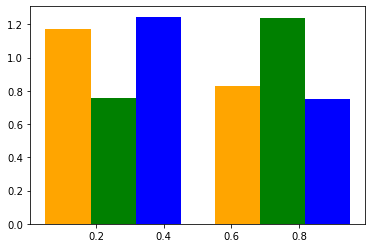

In [54]:
conAfter20201 = conBefore2020[(conBefore2020.Label == 0)]['GENERE']
conAfter20202 =  conBefore2020[(conBefore2020.Label == 1)]['GENERE']
conAfter20203 =  conBefore2020[(conBefore2020.Label == 2)]['GENERE']
plt.hist([conAfter20201,conAfter20202,conAfter20203], 2, density=True, histtype='bar',  color=colors, label=conAfter2020.GENERE)
plt.show()

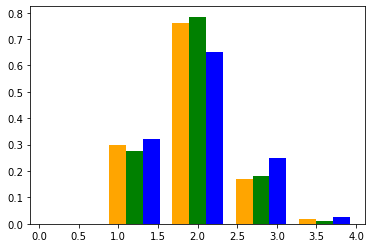

In [55]:
conAfter20201 = conBefore2020[(conBefore2020.Label == 0)]['ETA']
conAfter20202 =  conBefore2020[(conBefore2020.Label == 1)]['ETA']
conAfter20203 =  conBefore2020[(conBefore2020.Label == 2)]['ETA']
plt.hist([conAfter20201,conAfter20202,conAfter20203], 5, density=True, histtype='bar',  color=colors, label=conAfter2020.GENERE)
plt.show()

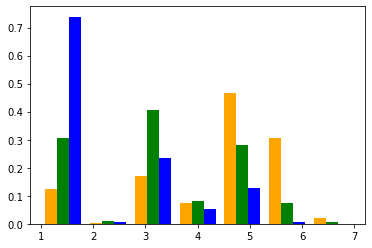

In [56]:
conAfter20201 = conBefore2020[(conBefore2020.Label == 0)]['TITOLOSTUDIO']
conAfter20202 =  conBefore2020[(conBefore2020.Label == 1)]['TITOLOSTUDIO']
conAfter20203 =  conBefore2020[(conBefore2020.Label == 2)]['TITOLOSTUDIO']
plt.hist([conAfter20201,conAfter20202,conAfter20203], 7, density=True, histtype='bar',  color=colors, label=conAfter2020.GENERE)
plt.show()

In [57]:
len(conBefore2020[conBefore2020.TITOLOSTUDIO == 1])

655089